In [1]:
import os
os.getcwd()
os.chdir('/Users/ItelinaMa/Documents/Metis/Benson')
import csv
from collections import defaultdict
import dateutil.parser
import datetime
from pandas import DataFrame, Series
import pandas as pd; import numpy as np

In [2]:
def Challenge_1():
    f = open('turnstile_150404.txt')
    csv_f = csv.reader(f)
    keys = []
    values = []
    
    for row in csv_f:
        keys.append(row[0:4])
        values.append(row[4:10])
    del keys[0]  
    del values[0]

    subwaydict = {}
    dummylist = []
    for i, key in enumerate(keys):
        if tuple(key) in dummylist:
            subwaydict[tuple(key)].append(values[i])
        else:
            subwaydict[tuple(key)] = [values[i]]
            dummylist.append(tuple(key))
    
    return subwaydict

In [3]:
def Challenge_2():
    f = open('turnstile_150404.txt')
    csv_f = csv.reader(f)
    keys = []
    values = []

    for row in csv_f:
        keys.append(row[0:4])
        values.append([row[6], row[7], row[9]])
    del keys[0]  
    del values[0]
    
    values2 = []
    for i in range(len(values)):
        values2.append([values[i][0] + ' ' + values[i][1]])
        values2[i].extend([values[i][2]])
        values2[i][0] = dateutil.parser.parse(values2[i][0])
    
    subwaydict = {}
    dummylist = []
    for i, key in enumerate(keys):
        if tuple(key) in dummylist:
            subwaydict[tuple(key)].append(values2[i])
        else:
            subwaydict[tuple(key)] = [values2[i]]
            dummylist.append(tuple(key))
    
    return subwaydict

In [4]:
def Challenge_3(data=None):
    if not data:
        data = Challenge_2()
    for turnstiles in data.keys():
        i = 0
        while i < len(data[turnstiles]):
            timegaps = [datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), datetime.time(3, 0)]
            if data[turnstiles][i][0].time() not in timegaps:
                del data[turnstiles][i]
            else:
                i += 1
        dates = {}
        for i, values in enumerate(data[turnstiles]):
            if i == len(data[turnstiles]) -1:
                break
            dates[values[0]] = int(data[turnstiles][i+1][1]) - int(values[1])
        data[turnstiles] = dates
    return data

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
def Challenge_4(data=None):
    if not data:
        data = Challenge_3()
    turnID = data.keys()[0]
    turnTimeS = data[turnID]
    dates = turnTimeS.keys()
    counts = turnTimeS.values()
    dates, counts = zip(*sorted(zip(dates, counts)))
    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)
    print(turnID)

('A030', 'R083', '01-06-00', '23 ST-5 AVE')


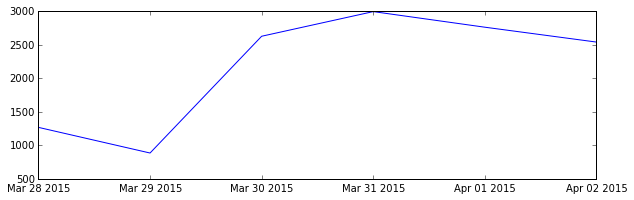

In [7]:
Challenge_4()

In [ ]:
def CleanData():
    #Function that cleans the data using pandas
    #Read, clean data and add ID column
    data = pd.DataFrame()
    data = data.from_csv('turnstile_150404.txt', index_col=False)
    data.columns = data.columns.map(str.strip)
    data['TurnstileID'] = data.ix[:, 0].map(str) + ' ' + data.ix[:, 1].map(str) + ' ' + data.ix[:, 2].map(str) + ' ' + data.ix[:, 3].map(str)
    colnames = data.columns
    
    #Make traffic data non-cumulative
    en = data['ENTRIES'].tolist()
    ex = data['EXITS'].tolist()
    ID = data['TurnstileID'].tolist()       
    envlm = []
    exvlm = []
    for i, item in enumerate(ID):
        if i == len(ID) -1:
            break
        if ID[i+1] == ID[i]:
            envlm.extend([int(en[i+1]) - int(en[i])])
            exvlm.extend([int(ex[i+1]) - int(ex[i])])
        else:
            envlm.extend([0])
            exvlm.extend([0])
    ID.pop(-1)

    #Make new data
    cleandata = pd.DataFrame()
    cleandata = pd.concat([data.ix[:len(data)-2, 0:9], pd.Series(envlm),  pd.Series(exvlm), pd.Series(ID)],axis=1, ignore_index=True)
    cleandata.columns = colnames
    
    #Get rid of data that has negative entry values
    cleandata = cleandata[cleandata.ENTRIES > 0]
    
    return cleandata